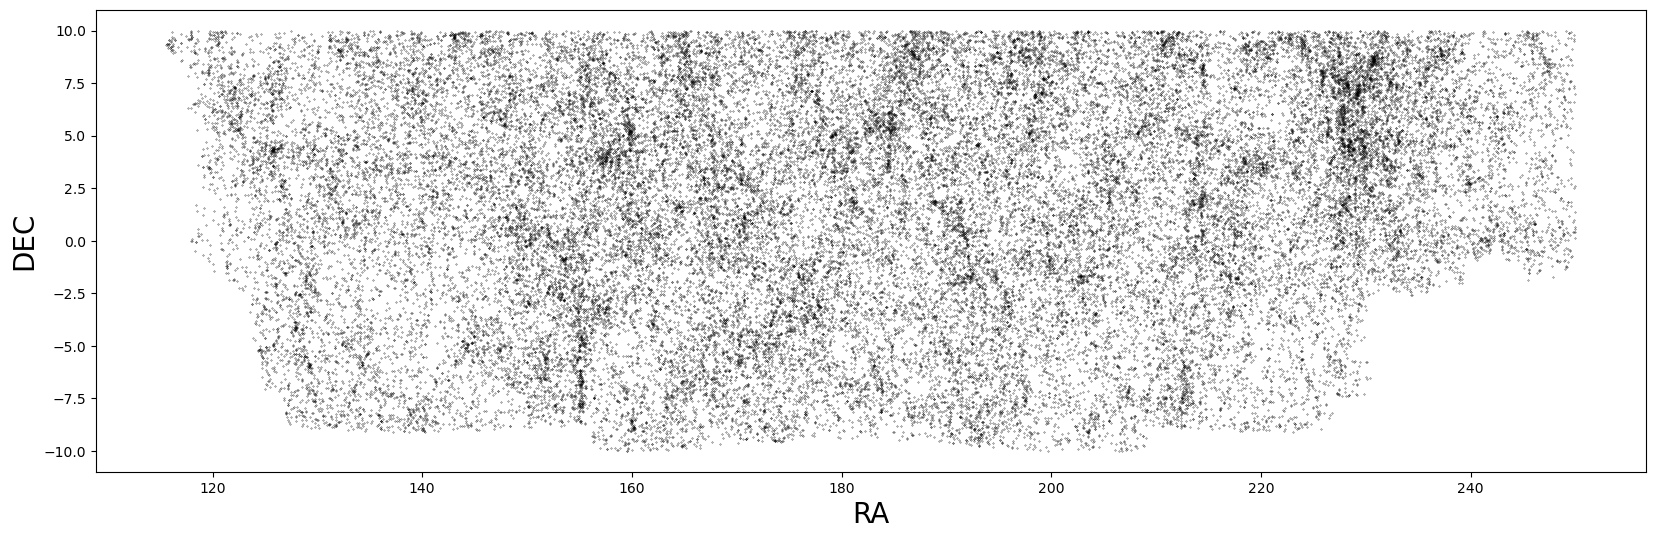

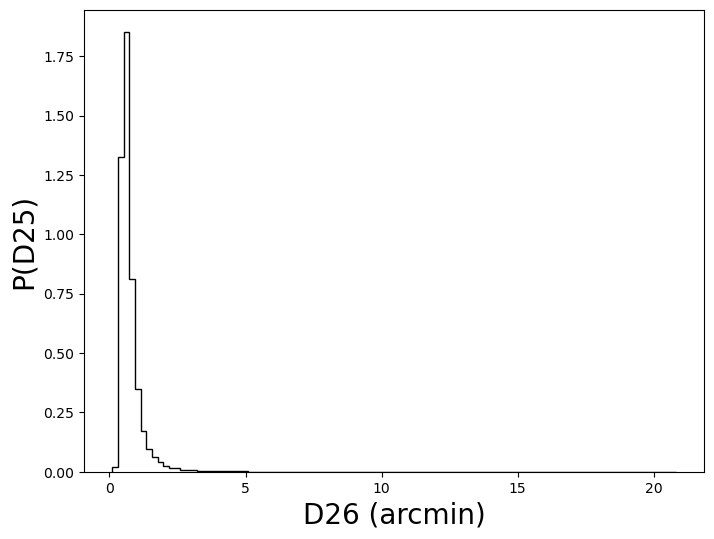

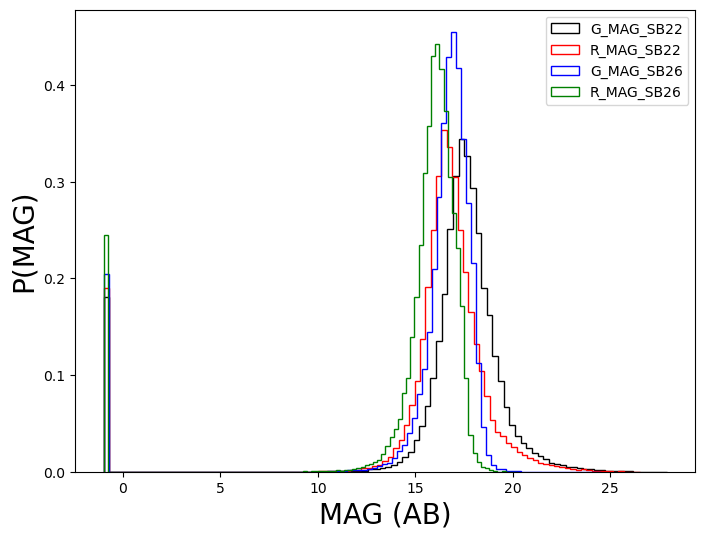

In [2]:
# basic set up
import numpy as np
import time
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from shapely.geometry import Point
from matplotlib.path import Path
from astropy.io import fits, ascii
from astropy.table import Column

# debug
import pdb

# read SGA-2020.fits
# https://www.legacysurvey.org/sga/sga2020/
from astropy.io import fits
with fits.open('../SGA-2020.fits') as hdul:
    sga_data = hdul[1].data

ra_min, ra_max, dec_min, dec_max = 100, 250, -10, 10 #note that this is a much larger range than HSC spring
mask_sga = (sga_data['RA']>ra_min) & (sga_data['RA']<ra_max) & (sga_data['DEC']>dec_min) & (sga_data['DEC']<dec_max)

#print(sga_data.columns)
plt.figure(figsize=(20, 6))
plt.plot(sga_data['RA'][mask_sga], sga_data['DEC'][mask_sga], 'k.', ms=0.5)
plt.xlabel('RA', fontsize=20)
plt.ylabel('DEC', fontsize=20)
plt.show()
plt.close()

# plot the distribution of D26
plt.figure(figsize=(8, 6))
plt.hist(sga_data['D26'][mask_sga], bins=100, histtype='step', color='k', density=True)
plt.xlabel('D26 (arcmin)', fontsize=20)
plt.ylabel('P(D25)', fontsize=20)
plt.show()
plt.close()

# plot the distribution of G_MAG_SB22, R_MAG_SB22, G_MAG_SB26, R_MAG_SB26
plt.figure(figsize=(8, 6))
plt.hist(sga_data['G_MAG_SB22'][mask_sga], bins=100, histtype='step', color='k', density=True, label='G_MAG_SB22')
plt.hist(sga_data['R_MAG_SB22'][mask_sga], bins=100, histtype='step', color='r', density=True, label='R_MAG_SB22')
plt.hist(sga_data['G_MAG_SB26'][mask_sga], bins=100, histtype='step', color='b', density=True, label='G_MAG_SB26')
plt.hist(sga_data['R_MAG_SB26'][mask_sga], bins=100, histtype='step', color='g', density=True, label='R_MAG_SB26')
plt.xlabel('MAG (AB)', fontsize=20)
plt.ylabel('P(MAG)', fontsize=20)
plt.legend()
plt.show()
plt.close()



In [ ]:
print(np.sum(mask_sga))

51831


9.609121